<a href="https://colab.research.google.com/github/dolmani38/concept_drift/blob/main/synthetic_data_generation_0201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

# rule을 바꾼 concept drift...

In [4]:
import random

seed_everything(seed=49)

data_x = {}
weight = {}
errors = []
# 난수의 평균
means = [1,1,2,2,3,3,4,4,5,5]
# 난수의 표준편차
stds =  [5,5,4,4,3,3,2,2,1,1]
# feature의 가중치
wss =   [5,4,3,2,1,1,1,3,1,1]
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    '''
    d1 = random.uniform(0.5, 10.0)
    d2 = random.uniform(0.0, 0.001)
    d3 = random.uniform(0.0, 0.003)
    w = random.uniform(0, 5)
    w_delta = random.uniform(-0.003, 0.001)
    '''
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(means[f],stds[f] + (i*0.005),100))
            weight[f'w{f}'].extend(wss[f]+ np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,3.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

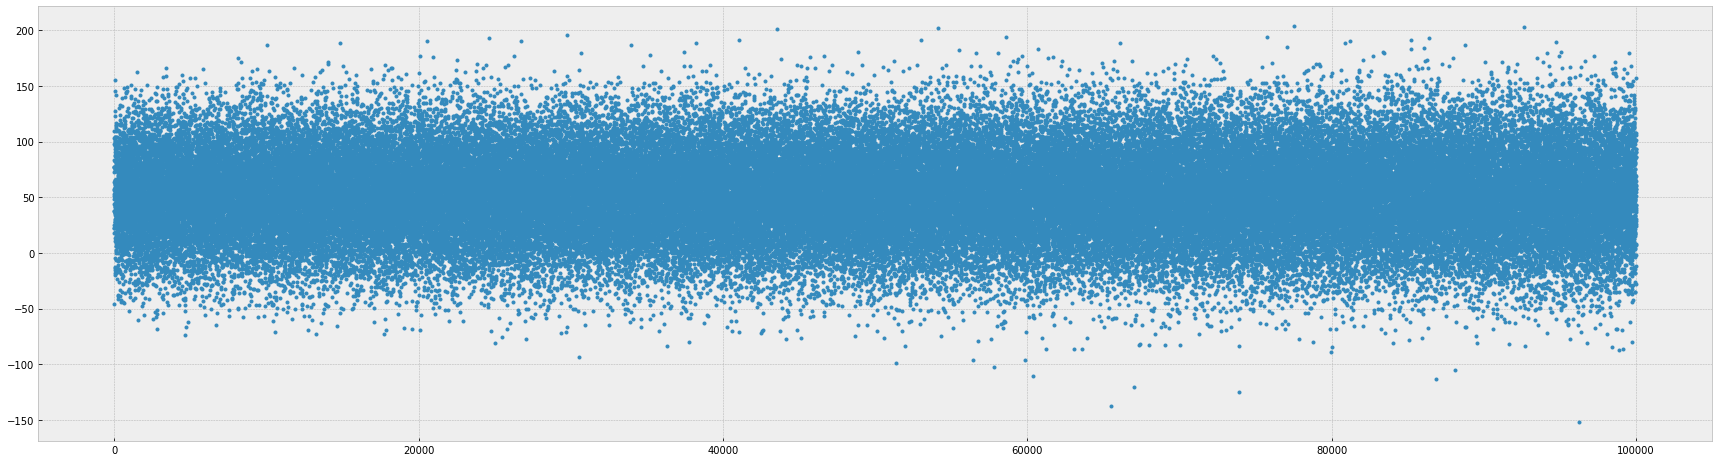

In [23]:
plt.figure(figsize=(30,8))
plt.plot(y[0:100000],'.')

In [5]:
dataset['y'] = [1 if i > 100 else 0 for i in y]

In [6]:
# 여기서 rule을 중간에 바꾸어서 concept drift 유도한다.
dataset[600000:]['y'] = [1 if i > 120 else 0 for i in y[600000:]]

<ipython-input-6-2610d59a1e85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[600000:]['y'] = [1 if i > 120 else 0 for i in y[600000:]]


In [7]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,-4.215795,5.440508,4.024901,3.079323,3.425494,2.301221,2.835076,4.504973,5.861010,5.303805,0
1,-3.104278,1.841072,-0.086673,2.357452,2.859748,2.753639,4.336327,5.925118,6.483631,6.993773,0
2,4.325729,6.170509,0.307435,-0.436571,6.627690,2.261619,1.353946,4.616297,4.965786,3.907357,0
3,10.113134,-1.634175,-3.535017,0.069396,0.512769,6.286857,6.566166,4.716676,4.842542,4.176116,0
4,-6.207917,5.887503,7.488916,4.279998,4.915012,-4.180305,1.589083,4.079667,4.820010,4.959878,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,-12.534492,-8.973740,-2.410065,-9.554795,8.367445,-2.757713,-4.051386,10.361918,-5.379513,2.562986,0
999996,10.124403,-3.487993,-5.218780,7.215164,-0.962517,4.667891,11.059069,9.238766,-2.688792,5.522656,0
999997,8.778662,9.828253,-1.563703,12.376727,3.439975,5.211362,9.724283,14.369158,2.357197,0.032630,1
999998,-4.126558,-3.344428,1.220364,18.690912,1.817486,-7.135917,16.427732,18.393710,6.919433,11.386548,0


In [ ]:
dataset.to_csv('/content/drive/MyDrive/laos/synthetic_dataset_2_0115.csv')

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values

base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')

base_score

(0.9712230215827338, 0.3609625668449198, 0.5263157894736842, None)

In [9]:

def __ks_2samp2(sample1, sample2):
    # Gets all observations
    sample1 = np.sort(sample1)
    sample2 = np.sort(sample2)
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]   
    data_all = np.concatenate([sample1, sample2])
    cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
    cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
    # Evaluates the KS statistic
    cddiffs = cdf1 - cdf2
    minS = -np.min(cddiffs)
    maxS = np.max(cddiffs)
    ks_stat =  max(minS, maxS)
    
    #if ks_stat == minS:
    #    ks_stat = -ks_stat
    
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(n1), float(n2)
    en = m * n / (m + n)
    p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
    #p_value = stats.kstwobign.sf(en * abs(ks_stat))
    return ks_stat,p_value

def __ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        s, p = __ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [10]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

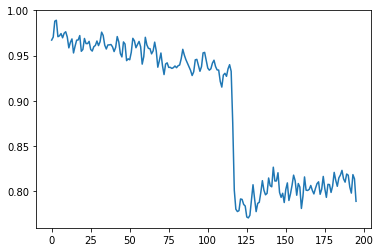

In [11]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

result_df = pd.DataFrame(result)
result_df['precision'].plot()

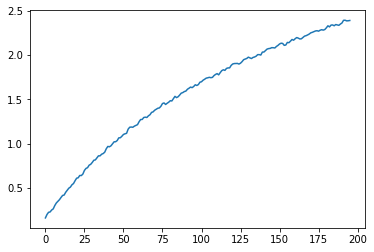

In [12]:
result_df['drift'].plot()

## 여기서, MI를 측정한다.

In [13]:

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

  feature  importance
0      x0    0.091449
1      x1    0.058833
2      x2    0.021290
3      x3    0.012050
4      x7    0.004669
5      x6    0.003680
6      x5    0.002904
7      x4    0.001451
8      x8    0.000766
9      x9    0.000008


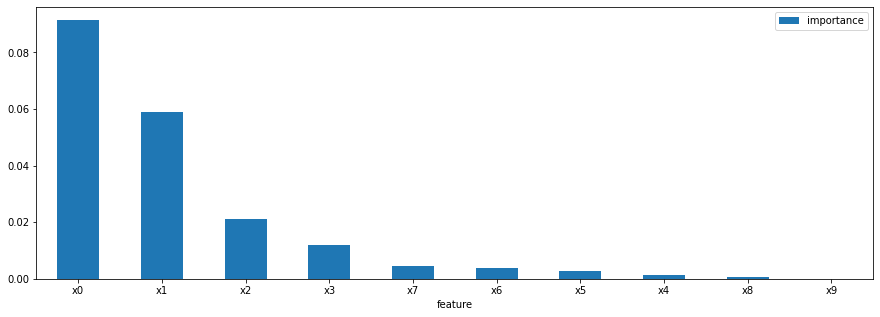

In [14]:
COLUMNS = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9']
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))

imp_df3 = pd.DataFrame({'feature':mi_scores.keys()[:10],'importance':mi_scores.values[:10]})
print(imp_df3)
imp_df3.plot.bar(x='feature',rot=0,figsize=(15,5))

In [15]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.7889

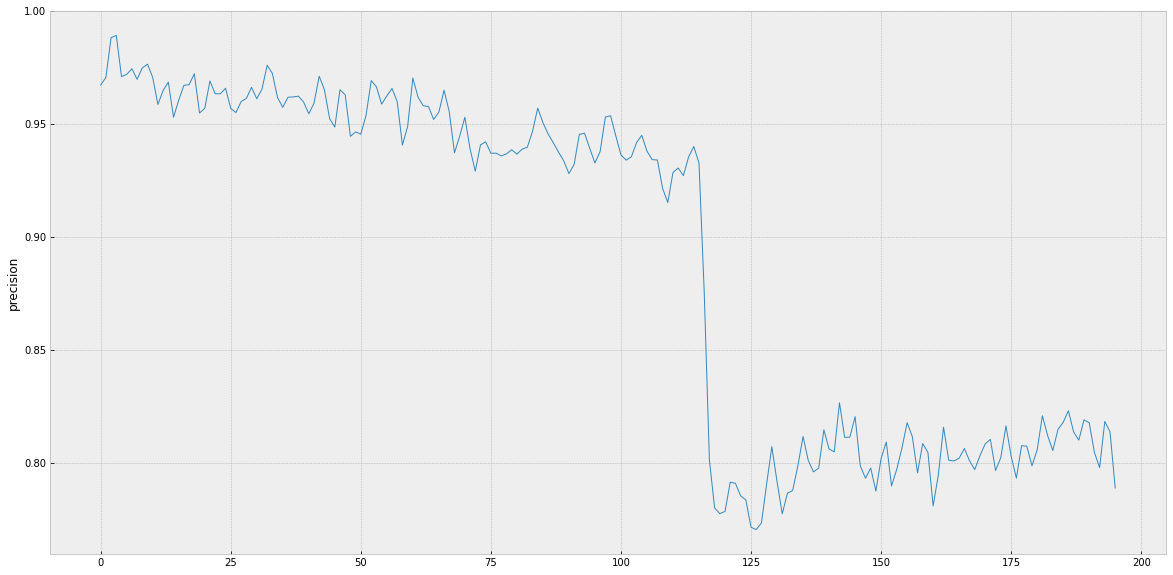

In [17]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

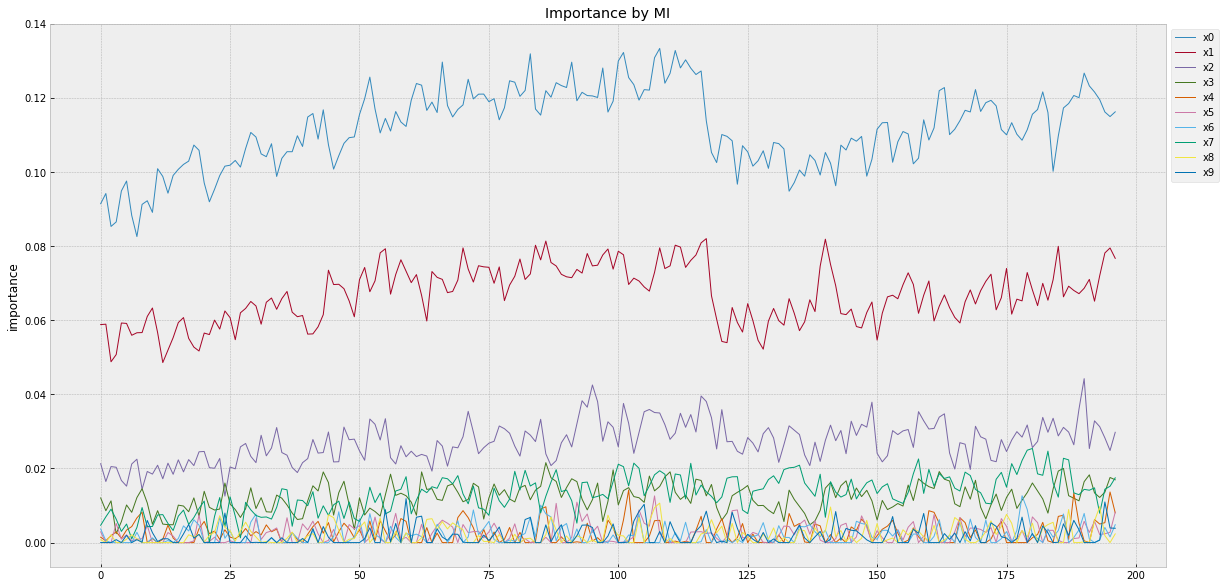

In [18]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

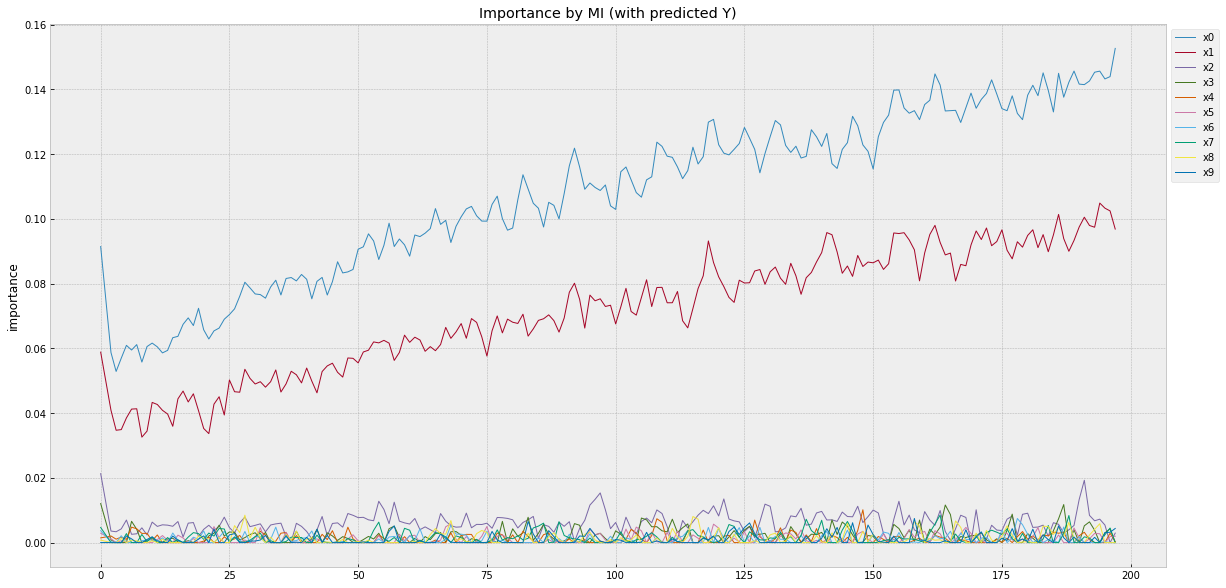

In [19]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

### 결론

rule을 바꾼 concept drift는 MI에서 변화를 감지 할 수 없다... 당연한거 아님!!!

# weight를 흔든 concept drift

In [60]:
import random

seed_everything(seed=49)

data_x = {}
weight = {}
errors = []
# 난수의 평균
#means = [1,1,2,2,3,3,4,4,5,5]
means = [1,1,1,1,1,1,1,1,1,1]
# 난수의 표준편차
stds =  [5,5,4,4,3,3,2,2,1,1]
# feature의 가중치
wss1 =   [5,1,4,1,3,1,1,1,1,1]
wss2 =   [5,1,4,1,1,3,1,1,1,1]
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    for i in range(1000):
        for j in range(10):
            data_x[f'x{f}'].extend(np.random.normal(3,1,100))
            if i > 500:
                weight[f'w{f}'].extend(wss2[f]+ np.random.normal(0.0,0.01,100))
            else:
                weight[f'w{f}'].extend(wss1[f]+ np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,3.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

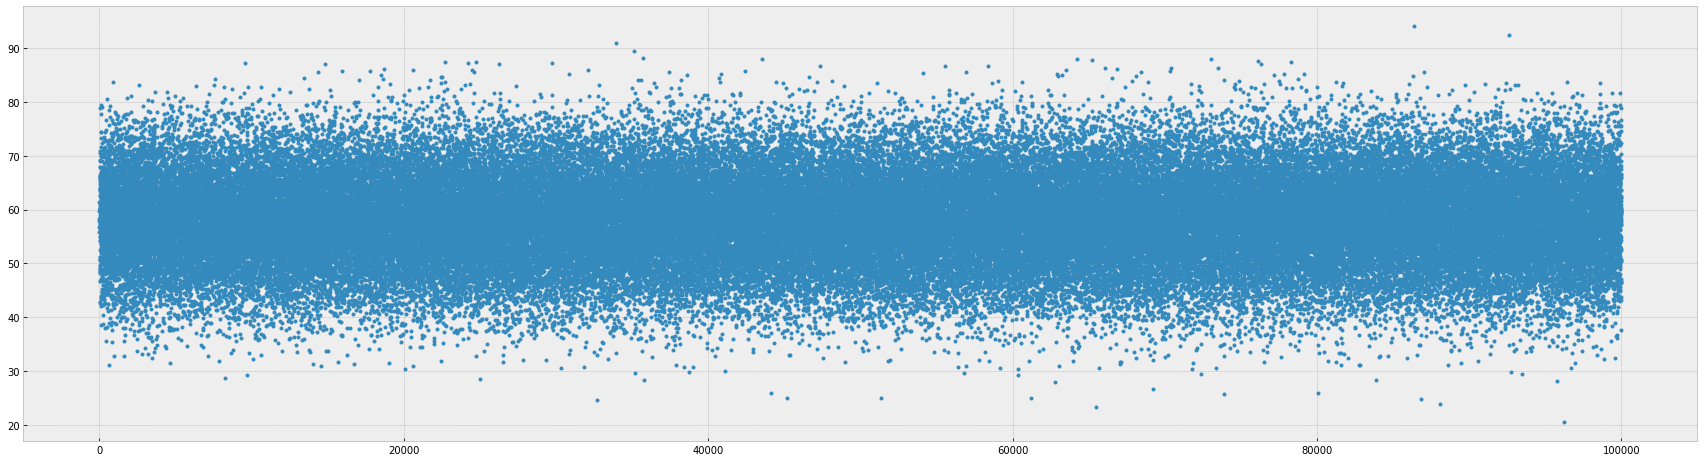

In [61]:
plt.figure(figsize=(30,8))
plt.plot(y[0:100000],'.')

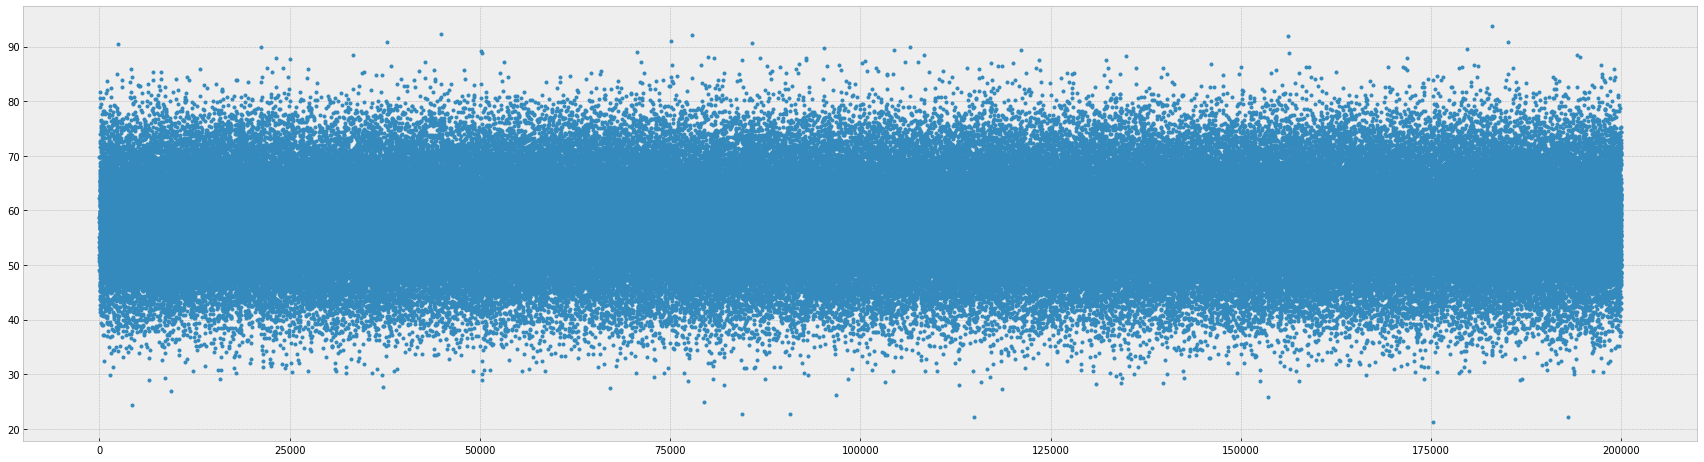

In [62]:
plt.figure(figsize=(30,8))
plt.plot(y[400000:600000],'.')

In [74]:
dataset['y'] = [1 if i > 65 else 0 for i in y]

In [75]:
dataset

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
0,1.956841,3.888102,3.506225,3.269831,3.141831,2.767074,2.417538,3.252487,3.861010,3.303805,0
1,2.179144,3.168214,2.478332,3.089363,2.953249,2.917880,3.168164,3.962559,4.483631,4.993773,0
2,3.665146,4.034102,2.576859,2.390857,4.209230,2.753873,1.676973,3.308148,2.965786,1.907357,0
3,4.822627,2.473165,1.616246,2.517349,2.170923,4.095619,4.283083,3.358338,2.842542,2.176116,0
4,1.558417,3.977501,4.372229,3.570000,3.638337,0.606565,1.794542,3.039833,2.820010,2.959878,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,1.645874,2.002127,2.509720,1.715420,3.671350,2.279836,1.848980,3.909495,1.268638,2.593492,0
999996,3.912897,2.550976,2.197467,3.579785,2.504376,3.208617,4.009159,3.748930,1.717466,3.087182,0
999997,3.778255,3.883267,2.603813,4.153611,3.055031,3.276593,3.818339,4.482367,2.559165,2.171415,1
999998,2.487088,2.565340,2.913326,4.855577,2.852093,1.732218,4.776659,5.057714,3.320172,4.065312,0


In [76]:
trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values
base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')
base_score

(0.8888888888888888, 0.3968668407310705, 0.5487364620938628, None)

In [77]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

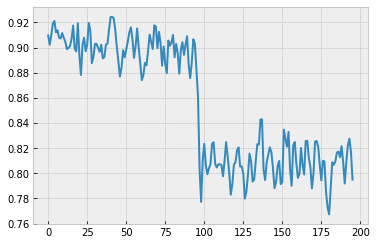

In [78]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

result_df = pd.DataFrame(result)
result_df['precision'].plot()

In [79]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi2)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


196/196 f1:0.7949

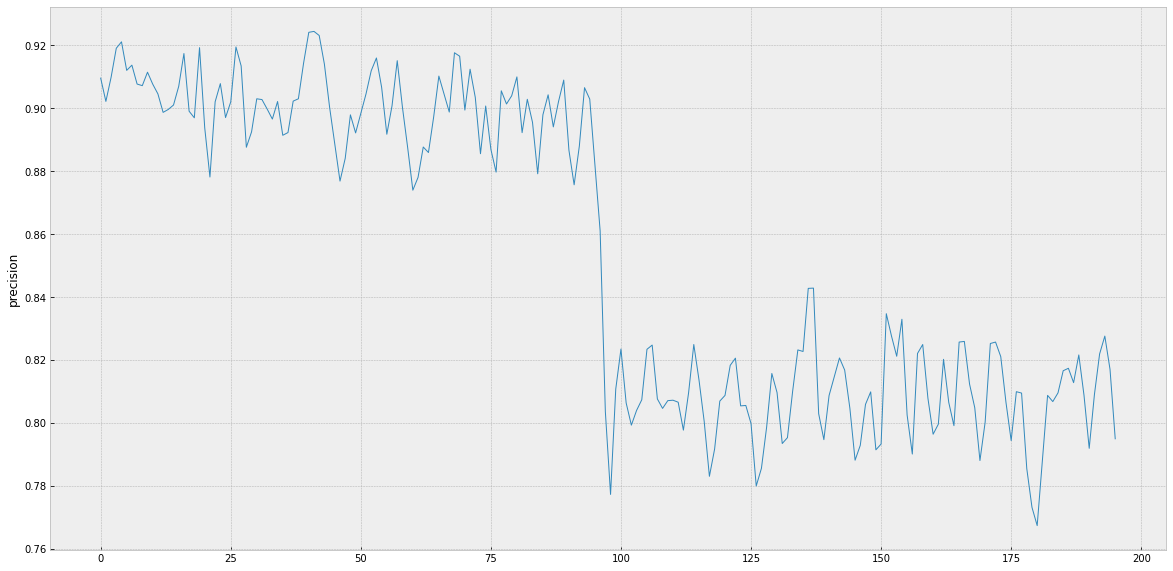

In [80]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

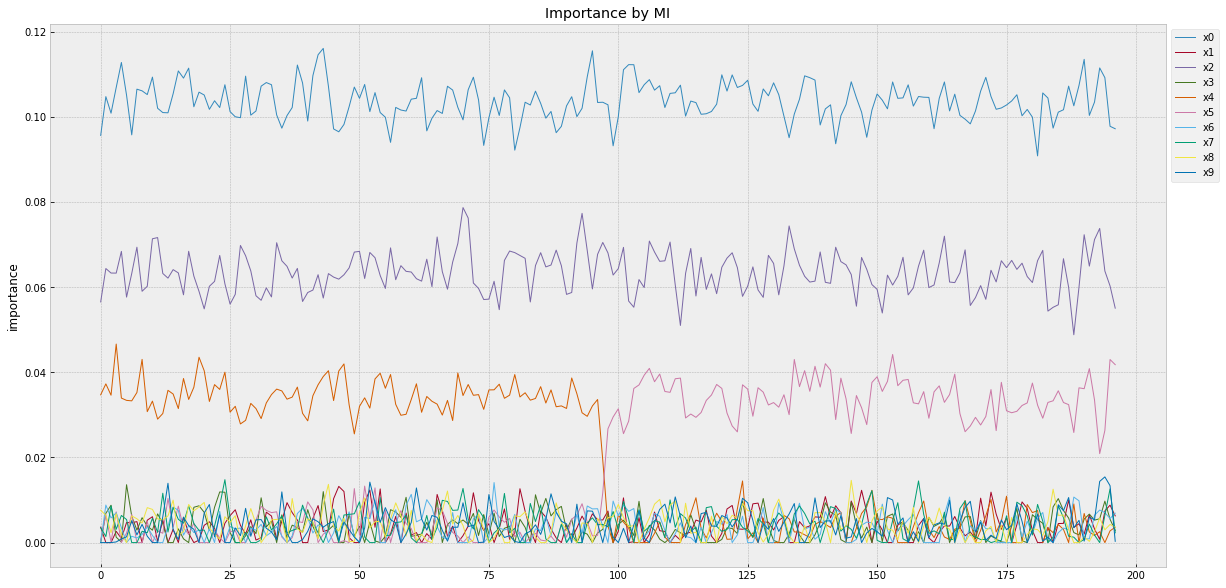

In [81]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

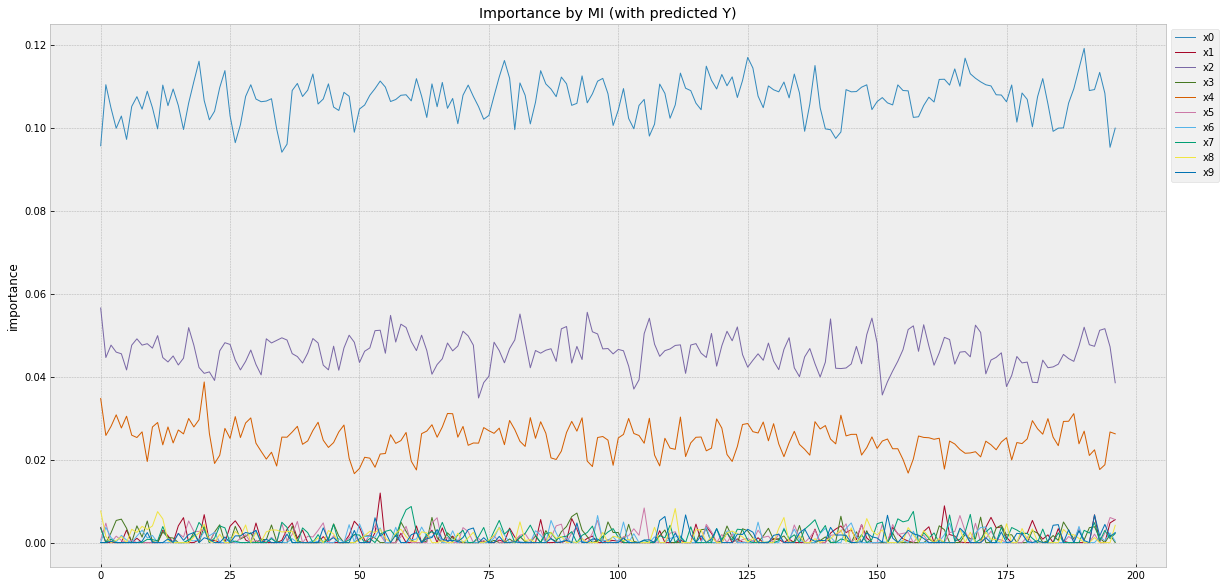

In [82]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

#### 급격한 drift에 의한 concept drift

In [153]:
import random

seed_everything(seed=49)

data_x = {}
weight = {}
errors = []
# 난수의 평균
means = [1,1,1,1,1,1,1,1,1,1]
# 난수의 표준편차
stds1 =  [1,1,1,1,1,1,1,1,1,1]
stds2 =  [5,4,3,2,1,1,1,1,1,1]
# feature의 가중치
wss =   [5,4,3,2,1,1,1,1,1,1]
for f in range(10):
    data_x[f'x{f}'] = []
    weight[f'w{f}'] = []
    for i in range(1000):
        for j in range(10):
            if i > 500:
                data_x[f'x{f}'].extend(np.random.normal(means[f],stds1[f],100))
            else:
                data_x[f'x{f}'].extend(np.random.normal(means[f],stds2[f],100))    
            weight[f'w{f}'].extend(wss[f]+ np.random.normal(0.0,0.01,100))
            #weight[f'w{f}'].extend(w + np.random.normal(0.0,0.01,100))

for i in range(10000):        
    errors.extend(np.random.normal(1.0,3.0,100))

dataset = pd.DataFrame(data_x)
importance = pd.DataFrame(weight)

y=np.sum(np.multiply(importance.values,dataset.values),axis=1) + np.asarray(errors)

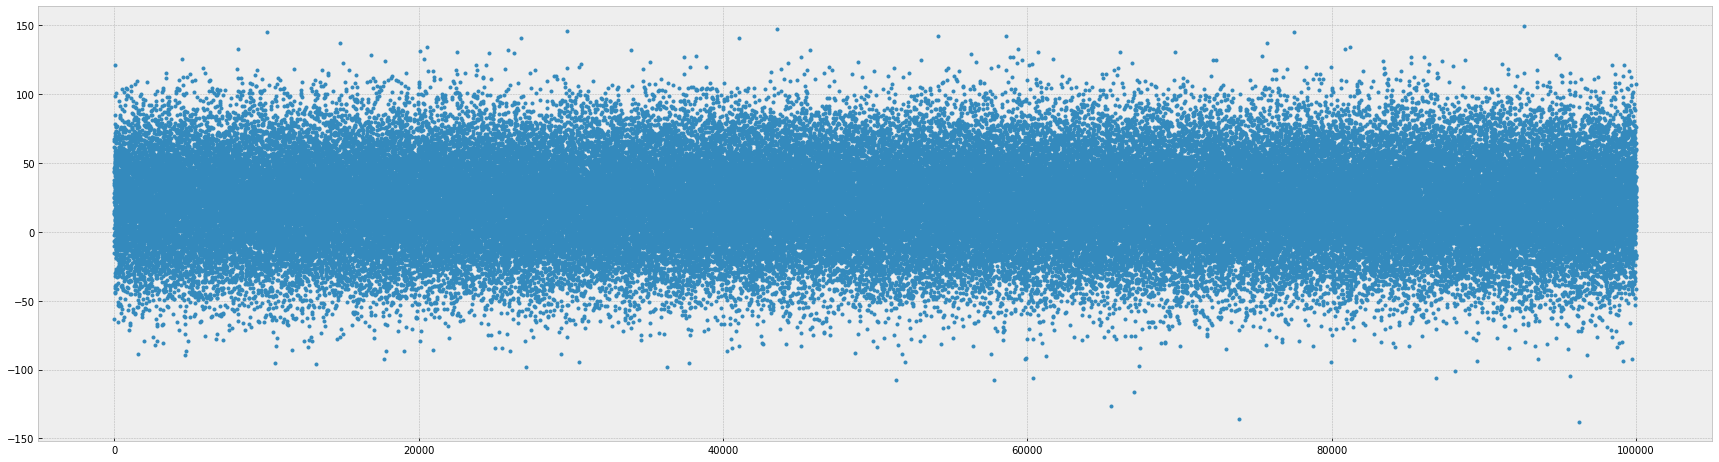

In [154]:
plt.figure(figsize=(30,8))
plt.plot(y[0:100000],'.')

In [163]:
dataset['y'] = [1 if i > 25 else 0 for i in y]

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

trainset = dataset[0:10000].drop(columns=['y']).values
train_y = dataset[0:10000]['y'].values
business_model = RandomForestClassifier(n_estimators=80,max_depth=5)
business_model.fit(trainset,train_y)
testset = dataset[10000:14000].drop(columns=['y']).values
test_y = dataset[10000:14000]['y'].values

base_score = precision_recall_fscore_support(test_y, business_model.predict(testset),average='binary')

base_score

(0.9199522102747909, 0.8815111619919863, 0.9003215434083601, None)

In [165]:
X2 = dataset[14000:].drop(columns=['y']).values
Y2 = dataset[14000:]['y'].values

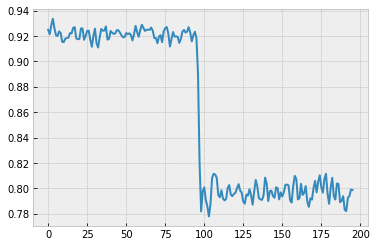

In [166]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    f1 = precision_recall_fscore_support(uy, business_model.predict(ux),average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))

result_df = pd.DataFrame(result)
result_df['precision'].plot()

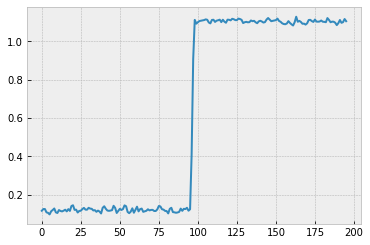

In [169]:
result_df['drift'].plot()

In [167]:
import math

result = {}
result['precision'] = []
result['predicted'] = []
result['drift'] = []

#MI
mi_scores = make_mi_scores(pd.DataFrame(trainset,columns=COLUMNS), train_y, discrete_features="auto")
imp_df_mi = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
print(imp_df_mi)

imp_df_mi2 = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
window_size = 10000
step = 5000
predicted = 0
batch = math.ceil((X2.shape[0]-window_size)/step)
for i in range(batch):
    ux = X2[i*step:i*step+window_size]
    uy = Y2[i*step:i*step+window_size]
    y_ = business_model.predict(ux)
    f1 = precision_recall_fscore_support(uy,y_ ,average='binary')
    drift = __ks_drift(trainset,ux)
    result['precision'].append(f1[0])
    result['predicted'].append(0.0)
    result['drift'].append(sum(abs(drift[:,0])))
    #MI
    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), uy, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi.loc[len(imp_df_mi)] = tmp_df.values.reshape(-1,)

    mi_scores = make_mi_scores(pd.DataFrame(ux,columns=COLUMNS), y_, discrete_features="auto")
    tmp_df = pd.DataFrame(mi_scores.values.reshape(1,-1),columns=list(mi_scores.keys()))[COLUMNS]
    imp_df_mi2.loc[len(imp_df_mi2)] = tmp_df.values.reshape(-1,)

    print(f"\r{i+1}/{batch} f1:{f1[0]:.4f}", end="", flush=True)


         x0        x1        x2        x3   x4   x5        x6        x7  \
0  0.254924  0.088177  0.019906  0.002515  0.0  0.0  0.006972  0.002525   

         x8        x9  
0  0.009254  0.001991  
196/196 f1:0.7987

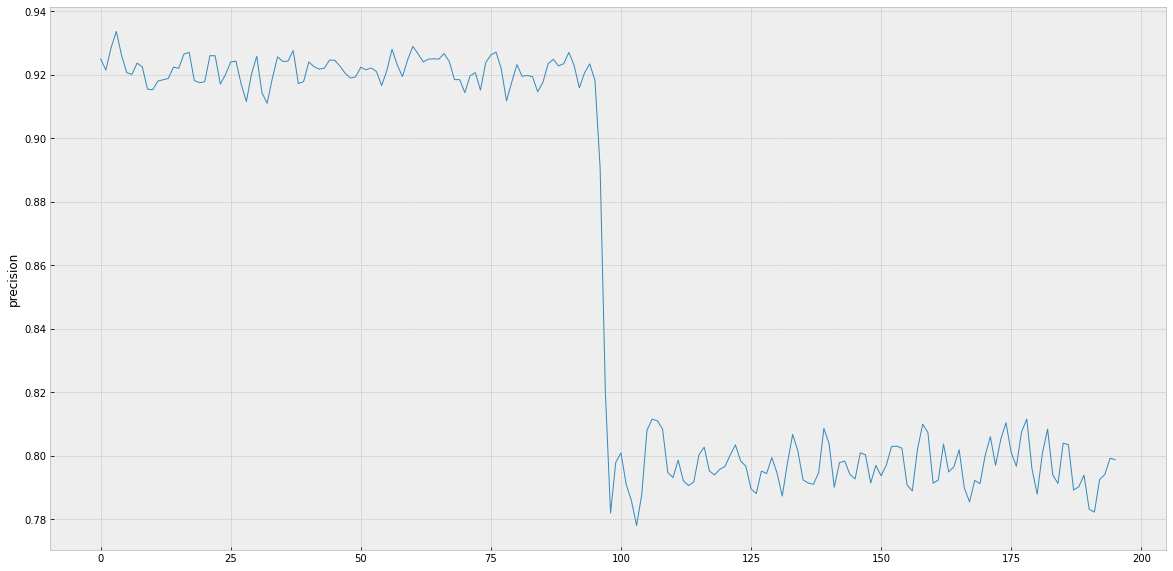

In [168]:
plt.style.use('bmh')

result_df = pd.DataFrame(result)
result_df['precision'].plot(ylabel='precision',linewidth=1,figsize=(20,10))

[]

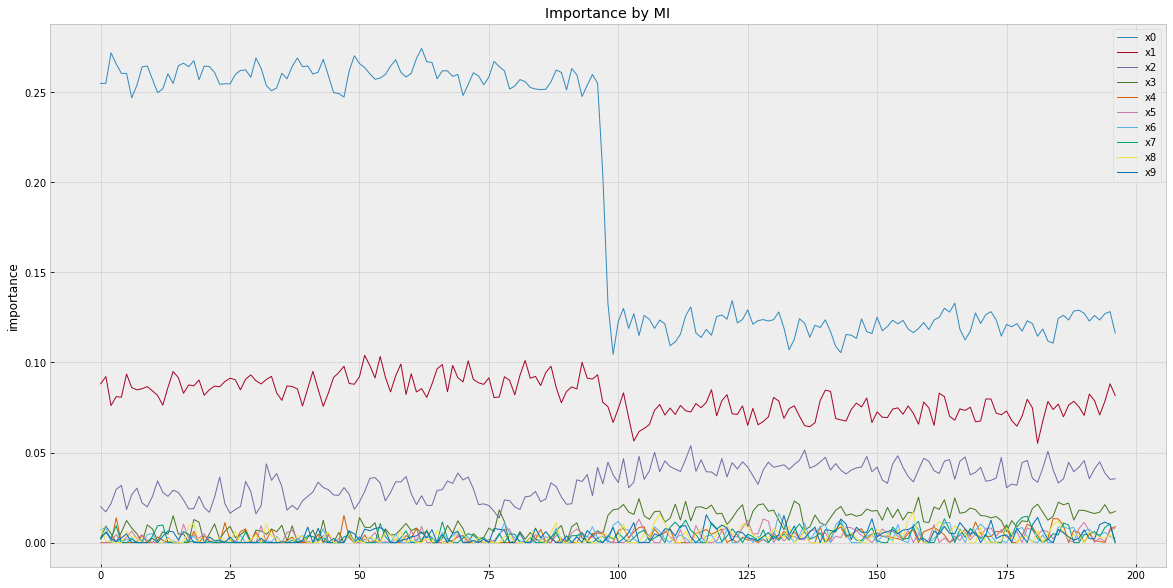

In [170]:
ax = imp_df_mi.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

[]

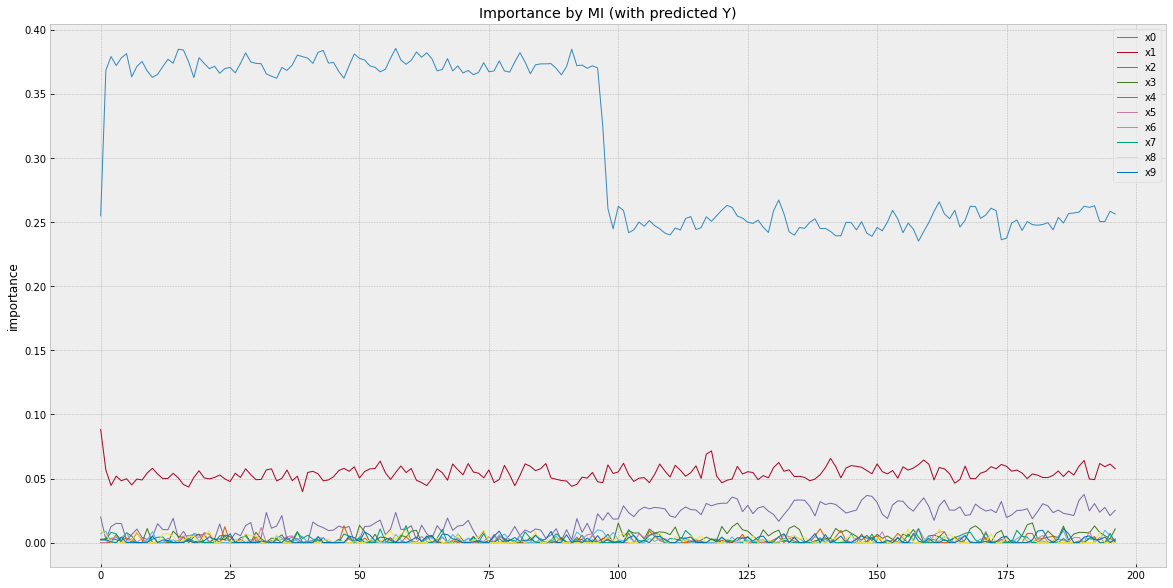

In [171]:
ax = imp_df_mi2.plot(ylabel='importance',linewidth=1,figsize=(20,10),legend=True)
ax.set_title("Importance by MI (with predicted Y)",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()